In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

In [ ]:
#leemos el archivo CSV
tweets=pd.read_csv('Keiko.csv')

In [ ]:
tweets.head()

,created_at,text,sad
0,2021-06-29 00:21:51,Detengámonos un momento y pongamos todo en man...,NaN
1,2021-06-27 21:53:38,Mañana iré a Palacio a entregarle al president...,NaN
2,2021-06-27 15:18:40,"Anoche, con la fe y esperanza intactas, nos un...",NaN
3,2021-06-26 00:51:40,Seguimos adelante con mucha esperanza. Los esp...,NaN
4,2021-06-22 19:45:49,Cargo del Habeas Data firmado por Domingo Garc...,NaN


In [ ]:
tweets.shape

(19, 3)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
### Porcesando DATA SET
print("STOPWORDS SPAÑOL")
print(stopwords.words('spanish'))
corpus = []
for i in range(0, len(tweets)):
    print(i)
    #eliminamos los links y hasgtags
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
	                                if 'http' not in word and '@' not in word and '#' not in word])
    #definimos que caracteres que pueden leer
    title = re.sub('[^a-zA-Z_á_é_í_ó_ú_ñ_Á_É_Í_Ó_Ú]', ' ', tweets['text'][i])
    #transformamos las mayusculas en minusculas
    title = title.lower()
    #generamos los arreglos respectivos para los tweets con los carcteres aceptados
    title = title.split()
    print(title)
    #eliminamos aquellas palabras que esten en el stopwords del español
    title = [word for word in title if not word in stopwords.words('spanish')]
    #volvemos a crear el corpus con las palabras aceptadas
    title = ' '.join(title)
    corpus.append(title)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
STOPWORDS SPAÑOL
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
corpus

['detengámonos momento pongamos manos dios video',
 'mañana iré palacio entregarle presidente sagasti carta nombre millones mil peruanos solo pedimos verdad electoral',
 'anoche fe esperanza intactas unimos oración presente futuro país',
 'seguimos adelante mucha esperanza espero mañana plaza bolognesi pm',
 'cargo habeas data firmado domingo garcía belaunde derecho millones peruanos acceder lista electores mesa sufragio verificar todas irregularidades denunciado jne',
 'fiscal logró enviarme prisión cuarta vez pretende dejarme sola momento decisivo jamás sentiré sola sé cuento apoyo peruanos voy defraudar',
 'sabemos hicieron voltear elección hoy necesitamos saber cómo hicieron si algún testimonio prueba cómo perú libre hizo trampa mesa denúncialo redes llévala medio envíala hagamos pública',
 'hoy unidos nunca',
 'momentos tan dramáticos saludo corazón padres país enseñan hijos existe logro esfuerzo alcanzan metas sacrificios momentos adversos rinden sacar adelante familia',
 'princi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Creando el Bag of Words
#crea un diccionario con todos los tokens
bow_article = CountVectorizer().fit(corpus)
#crea una lista de los tokens
count_tokens=bow_article.get_feature_names()
#se crea la matriz para el bag of words
article_vect = bow_article.transform(corpus)
#mostramos lo tokens
count_tokens

['acceder',
 'adelante',
 'adversos',
 'alcanzan',
 'algún',
 'ampliación',
 'anoche',
 'anuncio',
 'apoyo',
 'aún',
 'batalla',
 'belaunde',
 'bolognesi',
 'básico',
 'caer',
 'cargo',
 'carta',
 'ciudadana',
 'colectivos',
 'comunes',
 'comunismo',
 'constitucional',
 'convalidada',
 'corazón',
 'cuarta',
 'cuento',
 'cumpliendo',
 'cómo',
 'dando',
 'data',
 'debe',
 'debemos',
 'deber',
 'decirles',
 'decisivo',
 'defender',
 'defendiendo',
 'defensa',
 'defraudar',
 'dejarme',
 'democracia',
 'democráticamente',
 'denunciado',
 'denúncialo',
 'derecho',
 'derogación',
 'derogada',
 'después',
 'detengámonos',
 'dios',
 'domingo',
 'dr',
 'dramáticos',
 'dura',
 'efectos',
 'ejemplo',
 'elecciones',
 'elección',
 'electoral',
 'electores',
 'enseñan',
 'entregarle',
 'enviarme',
 'envíala',
 'esfuerzo',
 'esperanza',
 'espero',
 'espíritu',
 'existe',
 'expresidente',
 'expresidentes',
 'familia',
 'fe',
 'firmado',
 'fiscal',
 'futuro',
 'ganar',
 'garcía',
 'geopolíticamente',
 '

In [ ]:
#Mostramos al matriz
df_count_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_count_vect

,acceder,adelante,adversos,alcanzan,algún,ampliación,anoche,anuncio,apoyo,aún,batalla,belaunde,bolognesi,básico,caer,cargo,carta,ciudadana,colectivos,comunes,comunismo,constitucional,convalidada,corazón,cuarta,cuento,cumpliendo,cómo,dando,data,debe,debemos,deber,decirles,decisivo,defender,defendiendo,defensa,defraudar,dejarme,...,sacar,sacrificios,sagasti,saludo,san,seguimos,seguiremos,sentiré,ser,si,sola,solo,sufragio,sé,tan,tarde,terminado,testimonio,todas,totalmente,trampa,través,tribunal,unidos,unimos,urviola,vamos,vanya,vemos,verdad,verificar,vez,video,vigente,voltear,votar,voto,votos,voy,último
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


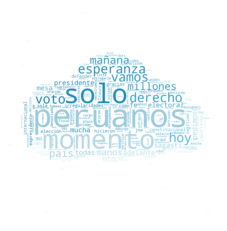

In [ ]:
aux = ""
for i in corpus:
	aux+=i
	aux+=" "
stopwords =set(STOPWORDS)
custom_mask = np.array(Image.open('nube1.jpg'))
wc = WordCloud(background_color = 'white', stopwords = stopwords, mask = custom_mask)
wc.generate(aux)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()